In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_normalized = pd.read_csv('/content/drive/MyDrive/Capstone/Data/dataset_wo.csv')

In [ ]:
# Features dan Label
X = df_normalized.drop(columns=['Exercise'])  # Features
y = df_normalized['Exercise']  # Label (Exercise adalah olahraga yang akan direkomendasikan)

# Encoding Label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Konversi label ke format numerik

# Split data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Definisikan arsitektur model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden Layer
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output Layer
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,733 (38.02 KB)

 Trainable params: 9,733 (38.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melatih model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2061 - loss: 2.5452 - val_accuracy: 0.2925 - val_loss: 1.5333
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2218 - loss: 1.8323 - val_accuracy: 0.3625 - val_loss: 1.5046
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 1.6447 - val_accuracy: 0.4275 - val_loss: 1.3606
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3826 - loss: 1.4516 - val_accuracy: 0.5975 - val_loss: 1.2182
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4377 - loss: 1.2804 - val_accuracy: 0.5400 - val_loss: 1.1122
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 1.1186 - val_accuracy: 0.5925 - val_loss: 1.0080
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5311 - loss: 1.0136 - val_accuracy: 0.6100 - val_loss: 0.8784
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5854 - loss: 0.9065 - val_accuracy: 0.5800 - val_loss:

In [ ]:
# Evaluasi pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.6474 
Accuracy on Test Data: 70.75%


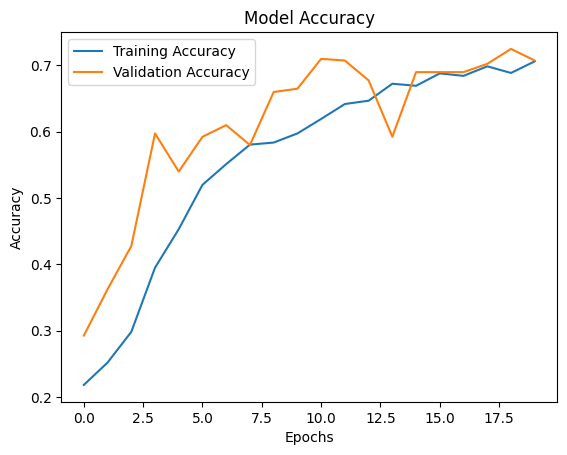

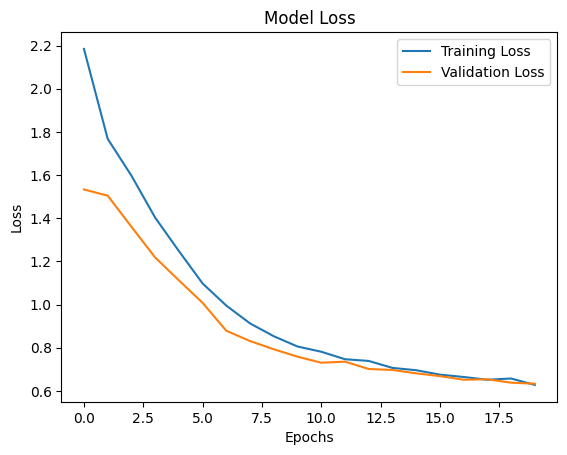

In [ ]:
# Plot akurasi selama pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss selama pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/exercise_recommendation_model.h5')

In [ ]:
input_shape = X_train.shape[1]

In [ ]:
new_user_data = np.array([[35, 0.65, 0.5, 2, 1, 0.6, 0.4, 0.5]])

In [ ]:
print(f"Expected input shape: {X_train.shape[1]} features")
print(f"New input shape: {new_user_data.shape[1]} features")


Expected input shape: 8 features
New input shape: 8 features


In [ ]:
# Mapping numerik ke label asli (contoh)
label_mapping = {0: "Jogging", 1: "Yoga", 2: "HIIT", 3: "Bersepeda", 4: "Renang"}

# Tambahkan kolom keterangan label
df_normalized['Exercise Label'] = df_normalized['Exercise'].map(label_mapping)


NameError: name 'df_normalized' is not defined

In [ ]:
# Tampilkan beberapa baris dataset
print(df_normalized[['Exercise', 'Exercise Label']].head())


   Exercise Exercise Label
0         0        Jogging
1         4         Renang
2         4         Renang
3         0        Jogging
4         2           HIIT


In [ ]:
# Contoh hasil prediksi
predicted_label_num = 4  # Hasil prediksi dari model (misalnya)
predicted_label = label_mapping[predicted_label_num]  # Ambil keterangannya

print(f"Rekomendasi Olahraga: {predicted_label}")


NameError: name 'label_mapping' is not defined